<a href="https://colab.research.google.com/github/gitnicolas343/intro_neurociencias_Computacionesles_phyton/blob/main/Lab4_Modelos_Formales_V2_VClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Modelos Formales

En los modelos formales, no hay un mecanismo de generación de spikes. La ecuación que describe la dinámica subumbral es de la forma

$$\tau \dot{V} = f(V) + RI(t)$$

junto con el mecanismo de disparo:

$$
t^f: V(t^f) = V_{th} \\
\lim_{\delta \to 0} V(t^f + \delta) = V_{reset}
$$

A continuación veremos el comportamiento de algunos modelos formales

## Ejercicio 1: Leaky Integrate and Fire

El modelo LIF es de la forma

$$
\tau \dot{V} = -(V - V_{rest}) + R I(t)
$$

Asuma que $V_{th} = -55.0$mV, $V_{reset}=V_{rest}=-75.0$mV, $\tau_m = 10.0$, $R=0.1$, $V(0)=-75.0$. Para todos los protocolos use un método de Euler con $dt = 0.1$

1. Simule una neurona LIF usando un protocolo de corriente $I = 100$pA entre $t = [50, 150]ms$.
2. Simule una neurona LIF usando un protocolo de corriente $I = 300$pA entre $t = [50, 150]ms$.
3. Simule la neurona LIF usando $I(t) = A(1 + \sin(\omega t))$, con $\omega = 0.5$ y $A = 200$pA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#parametros
V_th = -55
V_reset = -75
V_rest = -75
tau_m = 10
R = 0.1

In [ ]:
#funciones de corriente
#esta es la funcion escalon de corriente con corriente ejustable en los arametros iniciada en 100pA por defecto
def I_estimulo_constante_escalon(iap,corriente = 100):

    if  iap<=50:
        return 0
    elif iap>=150:
        return 0
    else:
        return corriente

#funcion senosoidal solicitada con parametros de fase y amplitud indicada
def senosoidal(iap,corriente = 100):
    fase = 0.5
    return corriente*(1+np.sin(fase*iap))

#funcion corriente variable

def corriente_variable(iap ,corriente = 100):
    return corriente

#NOTA: para las aplicaciondes de estas funciones es necesario que tengan los mismos argumentos puesto que las funciones
#van a recibir argumentos posicionales identicos

In [ ]:
#EVALUACIONES DE LAS CORRIENTES
i_eval =  np.arange(0,160,0.1)

#iteracion de toda la vida de las corrientes en las funciones

corriente_senosoidal = list()
for i in i_eval:
    corriente_senosoidal.append(senosoidal(i))

corrienrte_Escalon = list()
for i in i_eval:
    corrienrte_Escalon.append(I_estimulo_constante_escalon(i))

corriente_constante_300 = list()
for i in i_eval:
    corriente_constante_300.append(I_estimulo_constante_escalon(i, corriente = 300))

In [ ]:
#el modelo lo voy a  definir como funcion para efectos de la evaluacion de la curva I-F. Esta funcion esta establecida para que grafique los valores
#por defecto para el ensayo 1 y posterior a ello 'jugare' con los valores por defecto para cada ejercicio el objetivo es evitar
#repetir codigo

#funcion principal
def modeloscc(tiempo_inicial=50 ,                               #parametros ajustables de la funcion principal del modelo (su nombre me lo invente)
              tiempo_final=150,
              paso_h=0.1,
              vol_restet = -75,
              cord_inicial = -75,
              corriente = 100,
              v_th1 = -55,
              funcion_corriente = I_estimulo_constante_escalon #puedo llamar a una funcion con parametros establecido gracias a que son objetos de primera clase
              ):
    pico_spike = list()
    t = [float(tiempo_inicial)]                                #tiempo inicial
    tf = tiempo_final                                          #tiempo final
    h = paso_h                                                 #pasos de tiempo
    n = int(tf/h)                                              #numero de tiempo


    V = [float(cord_inicial)]                               #condicion inicial

    for i in range(n):                                      #ciclo principal del metodo de euler
        Vold = V[-1]                                        #variables en t0
        told = t[-1]
        I = funcion_corriente(told, corriente)              #aplicacion de la corriente en el tiempo old

        Vnew  = Vold + h*1/(tau_m)*(-(Vold - V_rest) + R*I) #metodo de euler



        if Vnew <= v_th1:                                    #condicion de reinicio de V
            V.append(Vnew)                                   #si vnew es menor que v_th se agrega el new
        else:                                                #si no se agrega el reset
             V.append(vol_restet)
             pico_spike.append(told)

        tnew =  told + h
        t.append(tnew)

    return t,V,pico_spike                                     #variables de interes (retorno)




In [ ]:
#modelos
#aqui se aplican las anteriores funciones variando los parametros por defecto  que se deben modificar
t_ensayo_1,V_ensayo_1,pico_spike1  = modeloscc()
t_ensayo_2,V_ensayo_2,pico_spike2  = modeloscc(corriente = 300)
t_ensayo_3, V_ensayo_3,pico_spike3  = modeloscc(funcion_corriente = senosoidal , corriente=200) #puedo referirme a una funcion siempre
                                                                                                #y cuando tenga los mismos argumentos
                                                                                                #que la  funcion base en la cual se aplica


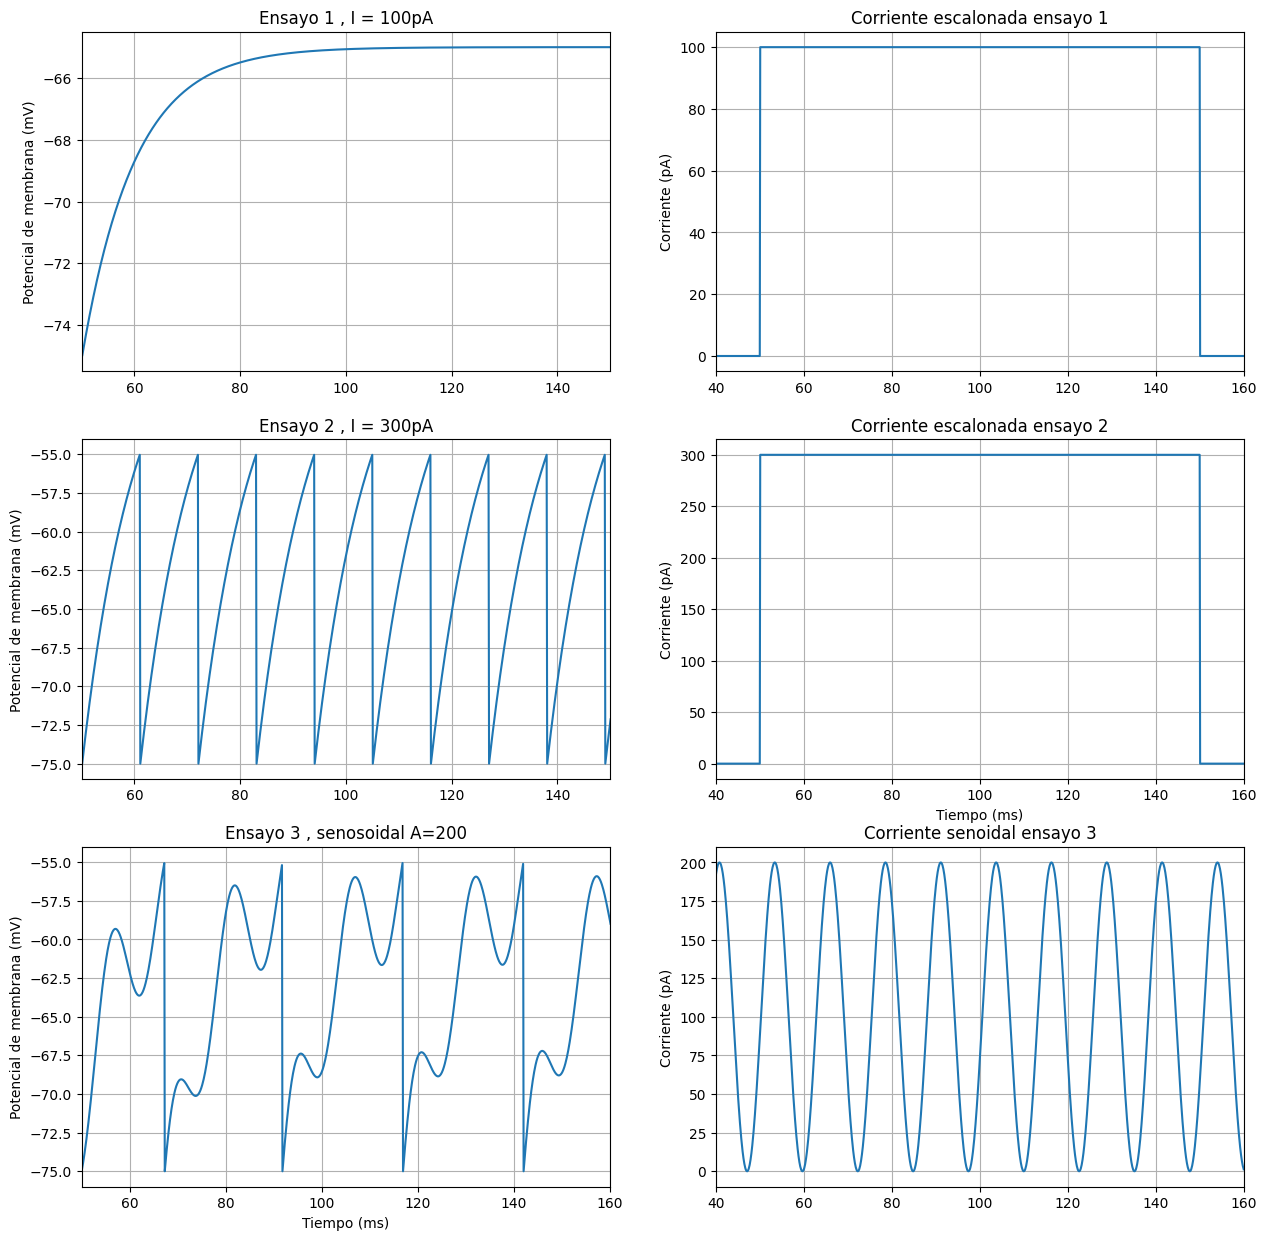

In [ ]:
#GRAFICAS
plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
plt.plot(t_ensayo_1,V_ensayo_1)
plt.ylabel('Potencial de membrana (mV)')
plt.title('Ensayo 1 , I = 100pA')
plt.xlim(50,150)
plt.grid()

plt.subplot(3,2,3)
plt.plot(t_ensayo_2,V_ensayo_2)
plt.ylabel('Potencial de membrana (mV)')
plt.title('Ensayo 2 , I = 300pA')
plt.xlim(50,150)
plt.grid()

plt.subplot(3,2,5)
plt.plot(t_ensayo_3,V_ensayo_3)
plt.ylabel('Potencial de membrana (mV)')
plt.title('Ensayo 3 , senosoidal A=200')
plt.xlabel('Tiempo (ms)')
plt.xlim(50,160)
plt.grid()

plt.subplot(3,2,2)
plt.plot(i_eval,corrienrte_Escalon)
plt.xlim(40,160)
plt.ylabel('Corriente (pA)')
plt.title('Corriente escalonada ensayo 1')
plt.grid()


plt.subplot(3,2,6)
plt.plot(i_eval,corriente_senosoidal)
plt.xlim(40,160)
plt.ylabel('Corriente (pA)')
plt.title('Corriente senoidal ensayo 3')
plt.grid()

plt.subplot(3,2,4)
plt.plot(i_eval,corriente_constante_300)
plt.xlim(40,160)
plt.ylabel('Corriente (pA)')
plt.xlabel('Tiempo (ms)')
plt.title('Corriente escalonada ensayo 2')
plt.grid()
plt.show()

## Ejercicio 2:

Compute la curva f-I y compare sus resultados con lo esperado teóricamente.

In [ ]:
#FRECIENCIA TEORICA


#aqui defini la frecuencia como una funcion para tener control del denominador y evitar errores al dividir por cero o sacar promedios
#de arreglos vacios
def frecuencia_teorica(I_0):
    denominador = -(V_th-V_rest)+I_0*R                      #denominador de la funcion terorica de T
    if denominador != 0  and denominador > 0:               #si el denominador es diferente de cero y positivo
        T = tau_m*(np.log(R*I_0/denominador))               #directamente es un valor valido
        return 1/T                                          #se devuelve el valor de F =1/T
    else:
        return 0                                            #si el denominador no es valido se devuelve cero

corriente = np.arange(0,500,0.1)                            #corrientes de simulacion (se usan tanto en la teorica como simulada)

freciencias = list()                                        #almaceno las frecuencias
for i in corriente:
    freciencias.append(frecuencia_teorica(i))               #ciclo principal


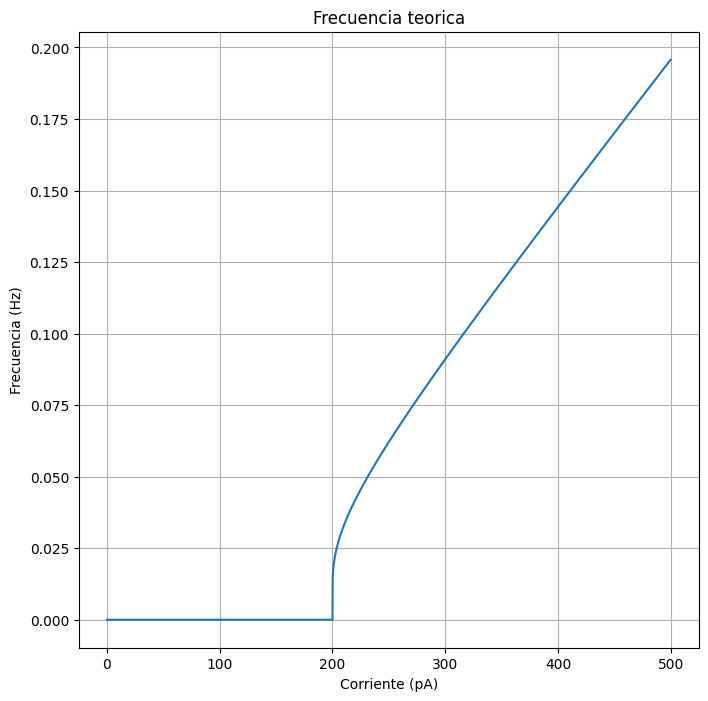

In [ ]:
#GRAFICAS
plt.figure(figsize=(8, 8))
plt.plot(corriente,freciencias)
plt.xlabel('Corriente (pA)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Frecuencia teorica')
plt.grid()
plt.show()

In [ ]:
#funcion de calculo de frecuencia

def frecuencia(tp):             #la modifique para que fitrara los valores de entrada y evitar que tenga odjetos con menos de 2 valores
                                #lo cual es poco conveniente para el calculo de la frecuencia
    if len(tp) < 2:
        return 0
    T_i = np.diff(tp)         #resta los valores dentro del arreglo de numpy
    T_med = np.mean(T_i)      #sacamos la media
    return 1/T_med            #retornamos el calculo f =1/T


In [ ]:
#CURVA I-F SIMULADA
freciencias_IF = list()

#ciclo principal de la curva I-F
for  i in corriente:
    t_ensayo_IF,V_ensayo_IF,pico_spikeIF = modeloscc(paso_h=0.01,
                                                     corriente = i ,
                                                     funcion_corriente = corriente_variable)   #tomo mi funcion original   y modifico los parametros
                                                                                               #de paso de tiempo y corriente y el tipo de corriente
                                                                                               #refiriendome a las funciones definidas al principio del notebook
    tdiff = np.array(pico_spikeIF)                                                             #obtengo los valores clave de la  funcion en esppecial pico_spikeIF
                                                                                               # me dice el tiempo en el que suponemos que hay spike
    freciencias_IF.append(frecuencia(tdiff))                                                   #agrego la frecuencia a la lista de frecuencias

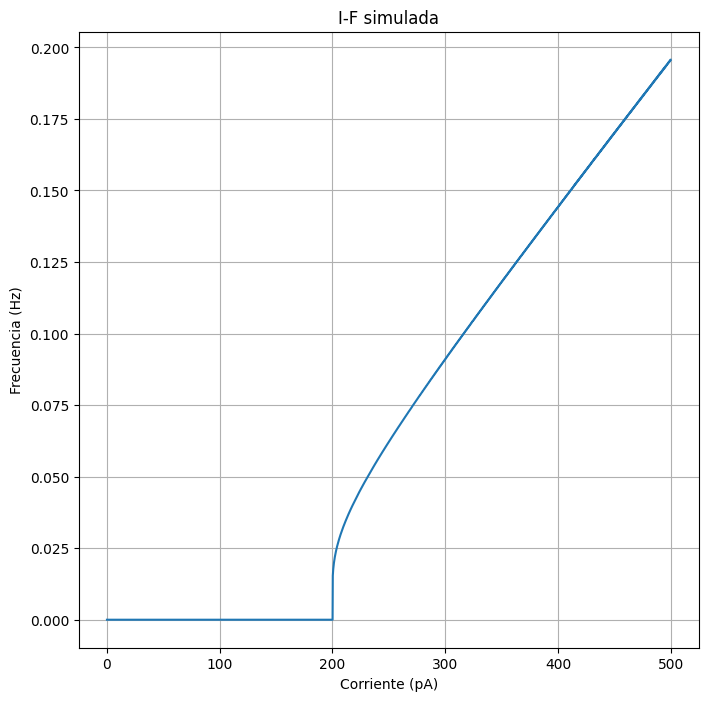

In [ ]:
#GRAFICA
plt.figure(figsize=(8, 8))
plt.plot(corriente,freciencias_IF)
plt.xlabel('Corriente (pA)')
plt.ylabel('Frecuencia (Hz)')
plt.title('I-F simulada')
plt.grid()
plt.show()

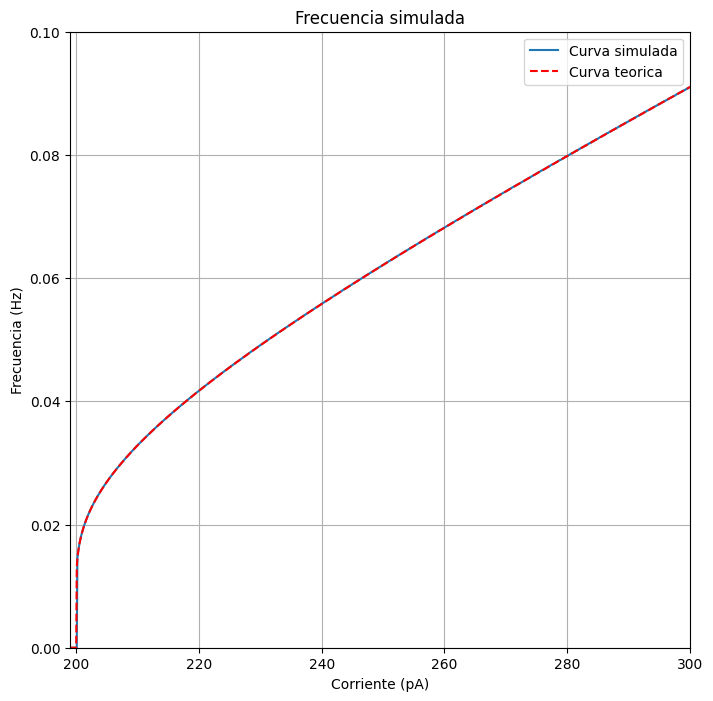

In [ ]:
#GRAFICAS
plt.figure(figsize=(8, 8))
plt.plot(corriente,freciencias_IF , label = 'Curva simulada')
plt.plot(corriente,freciencias,'r--' ,label ='Curva teorica' )
plt.xlabel('Corriente (pA)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Frecuencia simulada')
plt.xlim(199,300)
plt.ylim(0,0.10)
plt.legend()
plt.grid()
plt.show()

**COMPARACION:**
las curvas parecen ser muy similares unas con las otras, sin embargo si se prueba con un paso de euler de 0.1 vemos fluctuaciones en el paso de las corrientes indicando una falta de gama en el metodo usado lo que hace que la confiabilidad de las curvas halladas no sea la mejor como se muestra en la siguiente imagen:

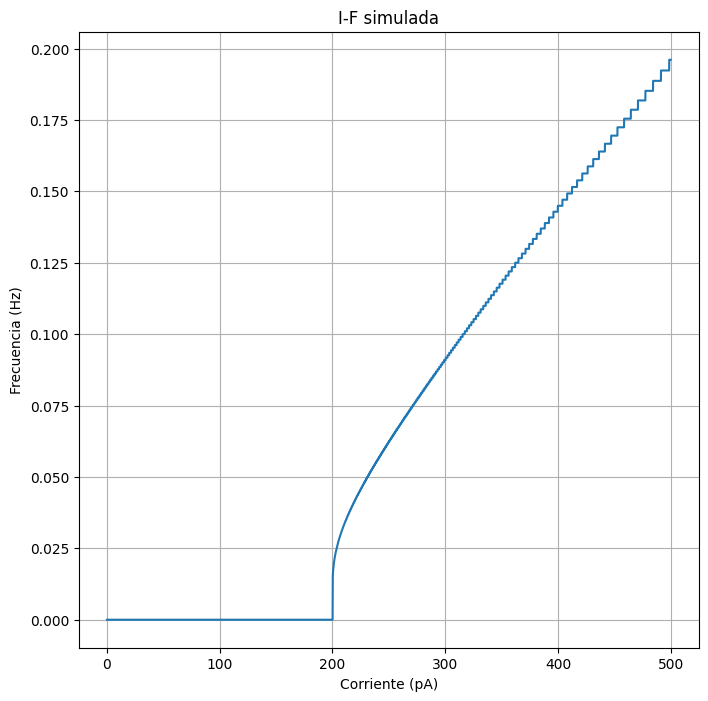

In [ ]:
#COMPARACION CON h =0.1, misma funcion anterior

freciencias_IF = list()

for  i in corriente:
    t_ensayo_IF,V_ensayo_IF,pico_spikeIF = modeloscc(paso_h=0.1,corriente = i , funcion_corriente = corriente_variable) #cambio h =0.1
    tdiff = np.array(pico_spikeIF)
    freciencias_IF.append(frecuencia(tdiff))

plt.figure(figsize=(8, 8))
plt.plot(corriente,freciencias_IF)
plt.xlabel('Corriente (pA)')
plt.ylabel('Frecuencia (Hz)')
plt.title('I-F simulada')

plt.grid()
plt.show()

## Ejercicio 3:

En ocasiones puede ser útil hacer que su código detecte automáticamente cuándo una condición determinada se cumple. Por ejemplo que su código pueda detectar automáticamente cuándo el potencial de membrana pasa por $V_{th}$ para así dar el tratamiento adecuado a su problema. -En nuestro caso resetear el potencial de membrana a $V_{rest}$-.

Para ello es útil usar una rutina automática de detección de eventos. solve_ivp tiene la opción **events** que trata precisamente este tipo de problemas. Intente leer la documentación sobre cómo implementar la rutina de detección de eventos en su problema y simule una neurona LIF sujeta a una corriente constante $I = 300$pA.

In [ ]:
#me basare en este ejemplo de la pagina official de scipy
from scipy.integrate import solve_ivp
def upward_cannon(t, y): return [y[1], -0.5]   #estas son las ecuaciones diferenciales
def hit_ground(t, y): return y[0]              #este es el evento sujeto de estudio
hit_ground.terminal = True                     #esta linea detiene la integracion
hit_ground.direction = -1                      #esta linea indica si el evento es ascendente o descendente
sol = solve_ivp(upward_cannon, [0, 100], [0, 10], events=hit_ground) #funcion de solve ivp con evento de paro
print(sol.t_events)                                                  #devuelve una arreglo con los anomalias encontraes
print(sol.t)

[array([40.])]
[0.00000000e+00 9.99900010e-05 1.09989001e-03 1.10988901e-02
 1.11088891e-01 1.11098890e+00 1.11099890e+01 4.00000000e+01]


In [ ]:
# TODO
#parametros del problema
V_th = -55
V_reset = -75
V_rest = -75
tau_m = 10
R = 0.1
I = 300

#definicion del modelo LIF
def modeloLIF(t,X,I,V_rest,R,tau_m):
    V = X[0]
    return 1/(tau_m)*(-(V - V_rest) + R*I)
#definicion del evento, esto funcion si la condicion de V - Vth se cruzan en este caso de forma ascendente, entonces solve_ivp para la integracion y
#y devuelve un arreglo con los puntos en el tiempo donde la encontro
def evento(t,X,I,V_rest,R,tau_m):
    V = X[0]
    return V-V_th
evento.terminal = True
evento.direction = 1                                                            #evento de forma ascendente


In [ ]:
#secuencia pricipal para emulacion en el tiempo de LIF
tiempo1 =[50,200]                                #esta es una lista de control actualizable para el ciclo while
V_muestreo = list()                              #aqui voy a "muestrear" los voltajes antes de las anomalias

tiempos_muestreo = list()                       #aqui voy a "muestrear" los tiempos antes de las anomalias

while tiempo1[0] < tiempo1[1]:                  #ciclo while principal, se repite hasta que el tiempo1[0] se hace igual o mayor que tiempo1[1]

    tspan= [tiempo1[0],tiempo1[1]]               #la idea es que muestre y en cada iteracion se actualice en el valor actual donde se encontro la aanomalia
    x0 = [-75]                                   #ya que la linea de tspan controla la secuancian de integracion en el tiempo de solve_ivp, si la actualizo cada vez a conveniencia puedo reiniciarla cada vez que alcanza vth
    variables = (300,-75,0.1,10)                 #parametros y condicion inicial
    solucion = solve_ivp(modeloLIF,tspan,x0,args=variables,dense_output = True ,events = evento )    #ejecucion de solve_ivp
    tiempo_denso = np.linspace(tspan[0], solucion.t[-1], 50000)
    V1 =list(solucion.sol(tiempo_denso)[0])                                                          #conviene tenerlo en listas puesto que puedo agregar sumando listas los nuevos valores
    V_muestreo = V_muestreo + V1
    tiempos_muestreo = tiempos_muestreo + list(tiempo_denso)                                         #guardo los valores
    tiempo1[0] = solucion.t[-1]                                                                      #actualizo tiempo[0]

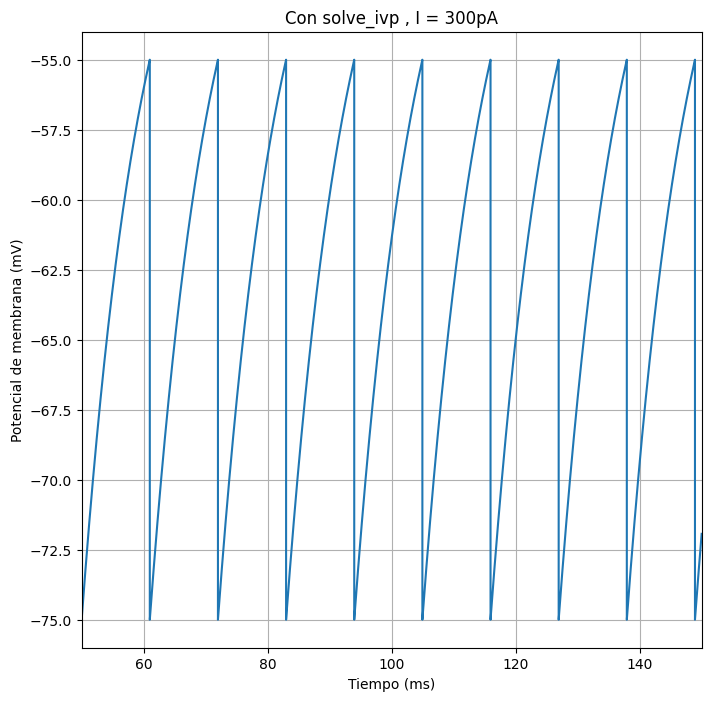

In [ ]:
#GRAFICA

plt.figure(figsize=(8, 8))
plt.plot(tiempos_muestreo,V_muestreo)
plt.xlim(50,150)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de membrana (mV)')
plt.title('Con solve_ivp , I = 300pA')
plt.grid()
plt.show()